In [36]:
# This cell loads the Airbnb Excel file, inspects structure, and prepares for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [37]:
# Read the provided Excel file
excel_path = '/content/1730285881-Airbnb_Open_Data.xlsx'
df_airbnb = pd.read_excel(excel_path)


In [38]:
# Standardize column names: lower, replace spaces with underscores for easier referencing
original_columns = df_airbnb.columns.tolist()
df_airbnb.columns = [c.strip().lower().replace(' ', '_') for c in df_airbnb.columns]

print(df_airbnb.head())
print(df_airbnb.shape)
print(df_airbnb.dtypes)

# Brief ack
print('Loaded dataset, standardized columns, and displayed head/shape/dtypes')

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee  minimum_nights  \
0  40.64749 -73.97237  United S

In [39]:
# Work on the existing df_airbnb from memory
# Clean currency columns by removing $ and commas and spaces
for col in ['price', 'service_fee']:
    if col in df_airbnb.columns:
        df_airbnb[col] = df_airbnb[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip()
        df_airbnb[col] = pd.to_numeric(df_airbnb[col], errors='coerce')

# Coerce numeric for likely numeric columns if present
numeric_guess = ['lat','long','construction_year','minimum_nights','number_of_reviews','reviews_per_month','review_rate_number','calculated_host_listings_count','availability_365']
for col in numeric_guess:
    if col in df_airbnb.columns:
        df_airbnb[col] = pd.to_numeric(df_airbnb[col], errors='coerce')

missing_summary = df_airbnb.isna().sum().sort_values(ascending=False)
describe_summary = df_airbnb.describe(include='all').transpose()

print(missing_summary.head(20))
print(describe_summary.head(15))
print('Cleaned numeric columns, computed missing values and descriptive stats')


license                           102597
house_rules                        54843
last_review                        15893
reviews_per_month                  15879
country                              532
availability_365                     448
minimum_nights                       409
host_name                            408
review_rate_number                   326
calculated_host_listings_count       319
host_identity_verified               289
service_fee                          273
name                                 270
price                                247
construction_year                    214
number_of_reviews                    183
country_code                         131
instant_bookable                     105
cancellation_policy                   76
neighbourhood_group                   29
dtype: int64
                           count unique                  top    freq  \
id                      102599.0    NaN                  NaN     NaN   
name                   

        id                                              name      host_id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host_name neighbourhood_group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service_fee  minimum_nights  \
0  40.64749 -73.97237  United S

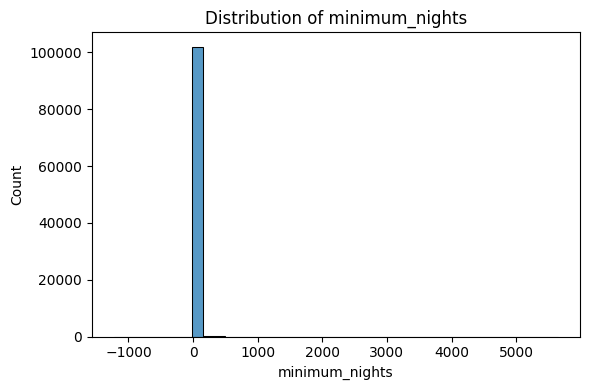

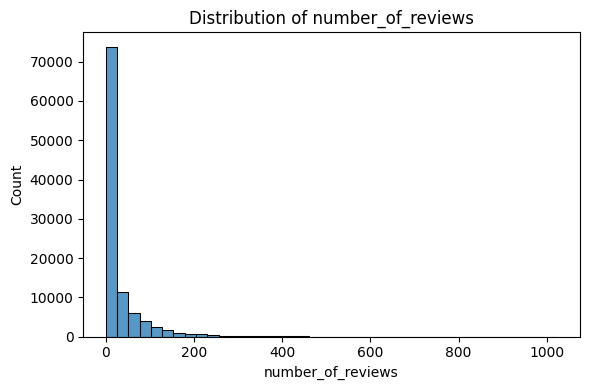

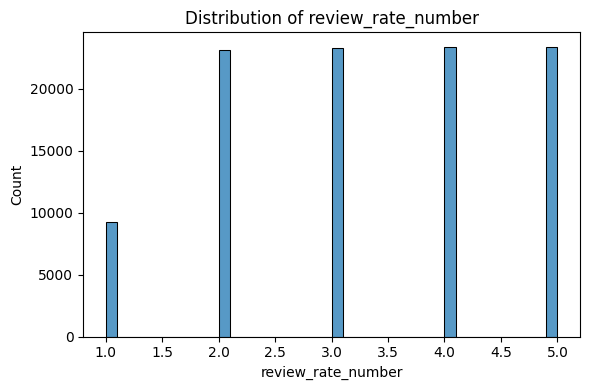

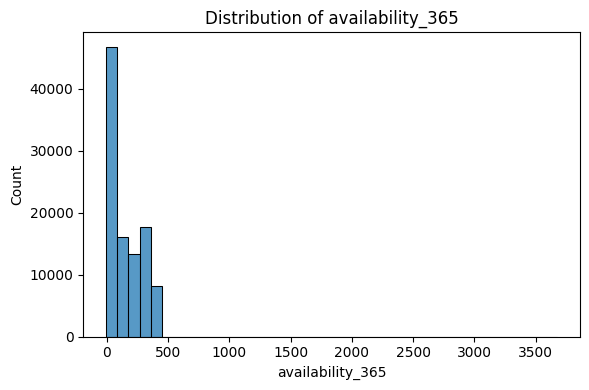

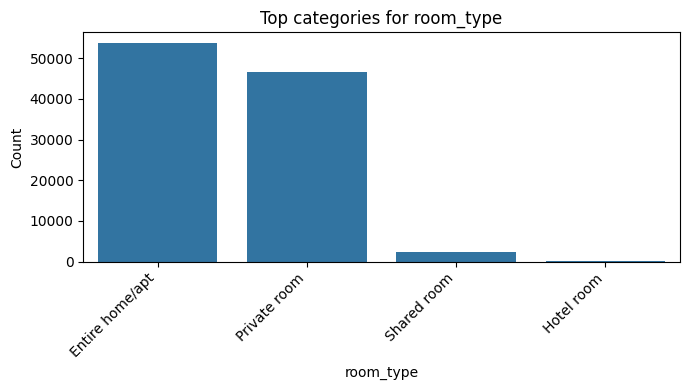

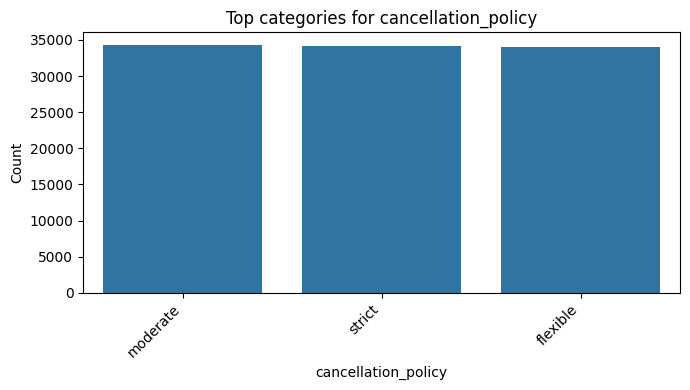

Plotted univariate distributions and categorical bars


In [40]:
# This cell continues EDA: univariate histograms/bar charts as requested
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ack variables
print(df_airbnb.head())

# Univariate distributions for numeric-like columns if present
num_cols = []
for c in ['minimum_nights','number_of_reviews','review_rate_number','availability_365']:
    if c in df_airbnb.columns:
        num_cols.append(c)

for c in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_airbnb[c].dropna(), bins=40, kde=False)
    plt.title('Distribution of ' + c)
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Categorical bar charts
for c in ['property_type','room_type','cancellation_policy']:
    if c in df_airbnb.columns:
        plt.figure(figsize=(7,4))
        counts = df_airbnb[c].value_counts().head(20)
        sns.barplot(x=counts.index, y=counts.values)
        plt.title('Top categories for ' + c)
        plt.ylabel('Count')
        plt.xlabel(c)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

print('Plotted univariate distributions and categorical bars')